In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import quandl
from bs4 import BeautifulSoup
import requests

In [31]:
quandl.ApiConfig.api_key = 'pdW2oJJUnbo8EruFxpKB'
quandl.get('EOD/HD', start_date='2017-12-26', end_date='2017-12-28')

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2017-12-26,188.53,190.42,188.34,190.36,2969182.0,0.0,1.0,176.301013,178.068418,176.123337,178.012310,2969182.0
2017-12-27,190.60,191.49,190.01,190.19,5912613.0,0.0,1.0,178.236743,179.069013,177.685013,177.853337,5912613.0
2017-12-28,190.91,190.98,189.64,189.78,3175631.0,0.0,1.0,178.526634,178.592094,177.339013,177.469932,3175631.0


In [59]:
list_of_ticker = pd.read_csv("data/wiki_prices.csv")
TK = list_of_ticker.ticker[1]

In [60]:
# Use the get request from the url to get the raw HTML data

# url = "https://www.quandl.com/api/v3/datatables/ETFG/FUND.json?ticker=SPY&api_key=YOURAPIKEY"
# url = "https://www.quandl.com/data/EOD-End-of-Day-US-Stock-Prices"
# url = "https://www.quandl.com/databases/WIKIP/data"
# url = "https://www.quandl.com/api/v3/datatables/WIKI/PRICES/delta.json?&api_key=pdW2oJJUnbo8EruFxpKB"
# url = "https://www.quandl.com/api/v3/datatables/{publisher}/{table}/metadata"
# url = "https://www.quandl.com/api/v3/datasets/EOD/HD?start_date=2020-04-01&end_date=2020-09-30&api_key=pdW2oJJUnbo8EruFxpKB"
# url = "https://finance.yahoo.com/quote/AMZN?p=AMZN&.tsrc=fin-srch"
url = "https://finance.yahoo.com/quote/TK/history?period1=1571443200&period2=1603065600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true"
resp = requests.get(url)
resp

<Response [200]>

In [33]:
# The below response shows the HTML code of the target url
resp.text

'<!DOCTYPE html><html id="atomic" class="NoJs desktop" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark(\'PageStart\');</script><meta charset="utf-8"/><title>Amazon.com, Inc. (AMZN) Stock Historical Prices &amp; Data - Yahoo Finance</title><meta name="keywords" content="AMZN, Amazon.com, Inc., AMZN historical prices, Amazon.com, Inc. historical prices, historical prices, stocks, quotes, finance"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="90376669494"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-US" content="Discover historical prices for AMZN stock on Yahoo Finance. View daily, weekly or monthly format back to when Amazon.com, Inc. stock was issued."/><meta name="oath:guce:consent-host" content="guce.yahoo.com"/>

In [34]:
# Use the BeautifulSoup pacakge to parse the HTML
soup = BeautifulSoup(resp.text, 'html.parser')
# soup = BeautifulSoup(url, 'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="NoJs desktop" id="atomic" lang="en-US">
 <head prefix="og: http://ogp.me/ns#">
  <script>
   window.performance && window.performance.mark && window.performance.mark('PageStart');
  </script>
  <meta charset="utf-8"/>
  <title>
   Amazon.com, Inc. (AMZN) Stock Historical Prices &amp; Data - Yahoo Finance
  </title>
  <meta content="AMZN, Amazon.com, Inc., AMZN historical prices, Amazon.com, Inc. historical prices, historical prices, stocks, quotes, finance" name="keywords"/>
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <meta content="on" property="twitter:dnt"/>
  <meta content="90376669494" property="fb:app_id"/>
  <meta content="#400090" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="Discover historical prices for AMZN stock on Yahoo Finance. View daily, weekly or monthly format back to when Amazon.com, Inc. stock was issued." lang="en-US" name="description"/>
  <meta content="

In [35]:
# Calculate the number of tables
table = soup.find_all("table")
print("There is {} table with data.".format(len(table)))

There is 1 table with data.


In [37]:
print(table[0].contents)

[<thead data-reactid="34"><tr class="C($tertiaryColor) Fz(xs) Ta(end)" data-reactid="35"><th class="Ta(start) W(100px) Fw(400) Py(6px)" data-reactid="36"><span data-reactid="37">Date</span></th><th class="Fw(400) Py(6px)" data-reactid="38"><span data-reactid="39">Open</span></th><th class="Fw(400) Py(6px)" data-reactid="40"><span data-reactid="41">High</span></th><th class="Fw(400) Py(6px)" data-reactid="42"><span data-reactid="43">Low</span></th><th class="Fw(400) Py(6px)" data-reactid="44"><span data-reactid="45">Close*</span></th><th class="Fw(400) Py(6px)" data-reactid="46"><span data-reactid="47">Adj Close**</span></th><th class="Fw(400) Py(6px)" data-reactid="48"><span data-reactid="49">Volume</span></th></tr></thead>, <tbody data-reactid="50"><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="51"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="52"><span data-reactid="53">Oct 16, 2020</span></td><td class="Py(10px) Pstart(10px)" data-reactid="54"><sp

In [39]:
# Looks like that the loop has executed 3 times
# Header, Body and Footer
for child in table[0].children:
    print(child)
    print("============")

<thead data-reactid="34"><tr class="C($tertiaryColor) Fz(xs) Ta(end)" data-reactid="35"><th class="Ta(start) W(100px) Fw(400) Py(6px)" data-reactid="36"><span data-reactid="37">Date</span></th><th class="Fw(400) Py(6px)" data-reactid="38"><span data-reactid="39">Open</span></th><th class="Fw(400) Py(6px)" data-reactid="40"><span data-reactid="41">High</span></th><th class="Fw(400) Py(6px)" data-reactid="42"><span data-reactid="43">Low</span></th><th class="Fw(400) Py(6px)" data-reactid="44"><span data-reactid="45">Close*</span></th><th class="Fw(400) Py(6px)" data-reactid="46"><span data-reactid="47">Adj Close**</span></th><th class="Fw(400) Py(6px)" data-reactid="48"><span data-reactid="49">Volume</span></th></tr></thead>
<tbody data-reactid="50"><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="51"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="52"><span data-reactid="53">Oct 16, 2020</span></td><td class="Py(10px) Pstart(10px)" data-reactid="54"><span

In [61]:
data = soup.findAll('tr')

In [62]:
data_without_header = data[1:]
data_without_header

[<tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="51"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="52"><span data-reactid="53">Oct 16, 2020</span></td><td class="Py(10px) Pstart(10px)" data-reactid="54"><span data-reactid="55">3,363.23</span></td><td class="Py(10px) Pstart(10px)" data-reactid="56"><span data-reactid="57">3,399.66</span></td><td class="Py(10px) Pstart(10px)" data-reactid="58"><span data-reactid="59">3,160.00</span></td><td class="Py(10px) Pstart(10px)" data-reactid="60"><span data-reactid="61">3,272.71</span></td><td class="Py(10px) Pstart(10px)" data-reactid="62"><span data-reactid="63">3,272.71</span></td><td class="Py(10px) Pstart(10px)" data-reactid="64"><span data-reactid="65">6,474,400</span></td></tr>,
 <tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="66"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="67"><span data-reactid="68">Oct 15, 2020</span></td><td class="Py(10px) Pstart(10px)" data-react

In [63]:
headers = data[0]
headers

<tr class="C($tertiaryColor) Fz(xs) Ta(end)" data-reactid="35"><th class="Ta(start) W(100px) Fw(400) Py(6px)" data-reactid="36"><span data-reactid="37">Date</span></th><th class="Fw(400) Py(6px)" data-reactid="38"><span data-reactid="39">Open</span></th><th class="Fw(400) Py(6px)" data-reactid="40"><span data-reactid="41">High</span></th><th class="Fw(400) Py(6px)" data-reactid="42"><span data-reactid="43">Low</span></th><th class="Fw(400) Py(6px)" data-reactid="44"><span data-reactid="45">Close*</span></th><th class="Fw(400) Py(6px)" data-reactid="46"><span data-reactid="47">Adj Close**</span></th><th class="Fw(400) Py(6px)" data-reactid="48"><span data-reactid="49">Volume</span></th></tr>

In [64]:
col_headers = [th.getText() for th in headers.findAll('th')]
col_headers

['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']

In [45]:
df_data = [[td.getText() for td in tr.findAll('td')] for tr in data_without_header]
df_data

[['Oct 16, 2020',
  '3,363.23',
  '3,399.66',
  '3,160.00',
  '3,272.71',
  '3,272.71',
  '6,474,400'],
 ['Oct 15, 2020',
  '3,292.01',
  '3,355.88',
  '3,280.00',
  '3,338.65',
  '3,338.65',
  '5,223,400'],
 ['Oct 14, 2020',
  '3,447.00',
  '3,464.88',
  '3,340.00',
  '3,363.71',
  '3,363.71',
  '5,828,900'],
 ['Oct 13, 2020',
  '3,467.99',
  '3,492.38',
  '3,424.22',
  '3,443.63',
  '3,443.63',
  '5,744,700'],
 ['Oct 12, 2020',
  '3,349.94',
  '3,496.24',
  '3,339.55',
  '3,442.93',
  '3,442.93',
  '8,364,200'],
 ['Oct 09, 2020',
  '3,210.00',
  '3,288.99',
  '3,197.83',
  '3,286.65',
  '3,286.65',
  '4,907,900'],
 ['Oct 08, 2020',
  '3,224.99',
  '3,233.29',
  '3,174.99',
  '3,190.55',
  '3,190.55',
  '3,174,100'],
 ['Oct 07, 2020',
  '3,135.00',
  '3,200.00',
  '3,132.39',
  '3,195.69',
  '3,195.69',
  '4,309,400'],
 ['Oct 06, 2020',
  '3,165.00',
  '3,182.00',
  '3,090.00',
  '3,099.96',
  '3,099.96',
  '5,086,900'],
 ['Oct 05, 2020',
  '3,145.84',
  '3,202.53',
  '3,140.85',
  '3

In [69]:
# Creating the dataframe
df_amzn = pd.DataFrame(df_data, columns=col_headers)
df_amzn.insert(0,'Ticker', TK)
df_amzn.head()

,Ticker,Date,Open,High,Low,Close*,Adj Close**,Volume
0,AA,"Oct 16, 2020","3,363.23","3,399.66","3,160.00","3,272.71","3,272.71","6,474,400"
1,AA,"Oct 15, 2020","3,292.01","3,355.88","3,280.00","3,338.65","3,338.65","5,223,400"
2,AA,"Oct 14, 2020","3,447.00","3,464.88","3,340.00","3,363.71","3,363.71","5,828,900"
3,AA,"Oct 13, 2020","3,467.99","3,492.38","3,424.22","3,443.63","3,443.63","5,744,700"
4,AA,"Oct 12, 2020","3,349.94","3,496.24","3,339.55","3,442.93","3,442.93","8,364,200"


In [98]:
df_amzn.shape

(101, 7)

In [70]:
list_of_ticker = pd.read_csv("data/wiki_prices.csv")
TK = list_of_ticker.ticker[2]

url = "https://finance.yahoo.com/quote/TK/history?period1=1571443200&period2=1603065600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true"
resp = requests.get(url)
soup = BeautifulSoup(resp.text, 'html.parser')
data = soup.findAll('tr')
headers = data[0]
data_without_header = data[1:]
col_headers = [th.getText() for th in headers.findAll('th')]
df_data = [[td.getText() for td in tr.findAll('td')] for tr in data_without_header]
df = pd.DataFrame(df_data, columns=col_headers)
df.insert(0,'Ticker', TK)
df.head()

,Ticker,Date,Open,High,Low,Close*,Adj Close**,Volume
0,AAL,"Oct 16, 2020",2.3000,2.3200,2.2000,2.2100,2.2100,"478,100"
1,AAL,"Oct 15, 2020",2.2800,2.3200,2.2000,2.3100,2.3100,"766,800"
2,AAL,"Oct 14, 2020",2.1900,2.2600,2.1800,2.1800,2.1800,"264,200"
3,AAL,"Oct 13, 2020",2.2200,2.2400,2.1500,2.2000,2.2000,"252,100"
4,AAL,"Oct 12, 2020",2.2400,2.3000,2.1600,2.1900,2.1900,"452,800"


In [71]:
list_of_ticker = pd.read_csv("data/wiki_prices.csv")
TK = list_of_ticker.ticker[3]

url = "https://finance.yahoo.com/quote/TK/history?period1=1571443200&period2=1603065600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true"
resp = requests.get(url)
soup = BeautifulSoup(resp.text, 'html.parser')
data = soup.findAll('tr')
headers = data[0]
data_without_header = data[1:]
col_headers = [th.getText() for th in headers.findAll('th')]
df_data = [[td.getText() for td in tr.findAll('td')] for tr in data_without_header]
df1 = pd.DataFrame(df_data, columns=col_headers)
df1.insert(0,'Ticker', TK)
df1.head()

,Ticker,Date,Open,High,Low,Close*,Adj Close**,Volume
0,AAMC,"Oct 16, 2020",2.3000,2.3200,2.2000,2.2100,2.2100,"478,100"
1,AAMC,"Oct 15, 2020",2.2800,2.3200,2.2000,2.3100,2.3100,"766,800"
2,AAMC,"Oct 14, 2020",2.1900,2.2600,2.1800,2.1800,2.1800,"264,200"
3,AAMC,"Oct 13, 2020",2.2200,2.2400,2.1500,2.2000,2.2000,"252,100"
4,AAMC,"Oct 12, 2020",2.2400,2.3000,2.1600,2.1900,2.1900,"452,800"


In [75]:
df_2 = pd.concat([df,df1])
df_2.head(10)

,Ticker,Date,Open,High,Low,Close*,Adj Close**,Volume
0,AAL,"Oct 16, 2020",2.3000,2.3200,2.2000,2.2100,2.2100,"478,100"
1,AAL,"Oct 15, 2020",2.2800,2.3200,2.2000,2.3100,2.3100,"766,800"
2,AAL,"Oct 14, 2020",2.1900,2.2600,2.1800,2.1800,2.1800,"264,200"
3,AAL,"Oct 13, 2020",2.2200,2.2400,2.1500,2.2000,2.2000,"252,100"
4,AAL,"Oct 12, 2020",2.2400,2.3000,2.1600,2.1900,2.1900,"452,800"
5,AAL,"Oct 09, 2020",2.3700,2.3900,2.2500,2.2500,2.2500,"453,600"
6,AAL,"Oct 08, 2020",2.2500,2.3800,2.2500,2.3700,2.3700,"527,900"
7,AAL,"Oct 07, 2020",2.2900,2.3000,2.1800,2.2300,2.2300,"519,500"
8,AAL,"Oct 06, 2020",2.3100,2.3800,2.2500,2.2800,2.2800,"321,100"
9,AAL,"Oct 05, 2020",2.2800,2.3500,2.2400,2.3200,2.3200,"236,000"


In [77]:
df_2.shape

(202, 8)

In [4]:
# Loading all the files into separate dataframes by year
# My data set will be the 2018 dataset.
df_2014 = pd.read_csv("data/2014_Financial_Data.csv")
df_2015 = pd.read_csv("data/2015_Financial_Data.csv")
df_2016 = pd.read_csv("data/2016_Financial_Data.csv")
df_2017 = pd.read_csv("data/2017_Financial_Data.csv")
df_2018 = pd.read_csv("data/2018_Financial_Data.csv")
# print the dataframe

In [5]:
# printing the output for each data source
print("There are: \n {r1[0]} rows in the 2014 dataset. \n {r2[0]} rows in the 2015 dataset. \n {r3[0]} rows in the 2016 dataset. \n {r4[0]} rows in the 2017 dataset. \n {r5[0]} rows in the 2018 dataset."
      .format(r1=df_2014.shape,r2=df_2015.shape,r3=df_2016.shape,r4=df_2017.shape,r5=df_2018.shape))

There are: 
 3808 rows in the 2014 dataset. 
 4120 rows in the 2015 dataset. 
 4797 rows in the 2016 dataset. 
 4960 rows in the 2017 dataset. 
 4392 rows in the 2018 dataset.


### I am chosing the 2018 dataset for my project.It shows that the 2018 dataset has 225 columns.
### I am only taking subset of the dataframe for my analysis.Showing the list of columns now

In [43]:
# verifying the size of the 2018 dataframe
# Loading the file 
filename = "data/2018_Financial_Data.csv"
df_csv = pd.read_csv(filename)
df_csv.shape

(4392, 225)

In [44]:
# verfying the various column names in the header
df_csv.columns[136]

'Cash per Share'

In [45]:
# show all columns
pd.set_option('max_columns',225)
df_csv.head

<bound method NDFrame.head of      Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0         CMCSA  9.450700e+10          0.1115     0.000000e+00  9.450700e+10   
1           KMI  1.414400e+10          0.0320     7.288000e+09  6.856000e+09   
2          INTC  7.084800e+10          0.1289     2.711100e+10  4.373700e+10   
3            MU  3.039100e+10          0.4955     1.250000e+10  1.789100e+10   
4            GE  1.216150e+11          0.0285     9.546100e+10  2.615400e+10   
...         ...           ...             ...              ...           ...   
4387       YRIV  0.000000e+00          0.0000     0.000000e+00  0.000000e+00   
4388       YTEN  5.560000e+05         -0.4110     0.000000e+00  5.560000e+05   
4389       ZKIN  5.488438e+07          0.2210     3.659379e+07  1.829059e+07   
4390        ZOM  0.000000e+00          0.0000     0.000000e+00  0.000000e+00   
4391       ZYME  5.301900e+07          0.0243     0.000000e+00  5.301900e+07   

      R&D

In [52]:
# creating a subset of the dataframe to work with
# defining the list of columns to work with
column = ['Unnamed: 0','Revenue','Gross Profit','Operating Expenses','Operating Income','Interest Expense',
         'Earnings before Tax','Net Income','EPS','Dividend per Share','Gross Margin','EBITDA',
         'Revenue per Share','Net Income per Share','Market Cap','PE ratio','Price to Sales Ratio',
         'Debt to Equity','Debt to Assets','Sector']
df_csv_subset = pd.read_csv(filename, usecols=column)
df_csv_subset.head(5)

,Unnamed: 0,Revenue,Gross Profit,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Net Income,EPS,Dividend per Share,Gross Margin,EBITDA,Revenue per Share,Net Income per Share,Market Cap,PE ratio,Price to Sales Ratio,Debt to Equity,Debt to Assets,Sector
0,CMCSA,9.450700e+10,9.450700e+10,7.549800e+10,1.900900e+10,3.542000e+09,1.511100e+10,1.173100e+10,2.56,0.917,1.0000,2.932900e+10,20.7730,2.5785,1.549106e+11,13.3008,1.6391,1.5604,0.4440,Consumer Cyclical
1,KMI,1.414400e+10,6.856000e+09,3.062000e+09,3.794000e+09,1.917000e+09,2.196000e+09,1.609000e+09,0.66,0.725,0.4847,6.410000e+09,6.3827,0.7261,3.394394e+10,23.3030,2.3999,1.1083,0.4733,Energy
2,INTC,7.084800e+10,4.373700e+10,2.042100e+10,2.331600e+10,-1.260000e+08,2.331700e+10,2.105300e+10,4.57,1.200,0.6173,3.227600e+10,15.3650,4.5658,2.141885e+11,10.2691,3.0232,0.3535,0.2060,Technology
3,MU,3.039100e+10,1.789100e+10,2.897000e+09,1.499400e+10,3.420000e+08,1.430300e+10,1.413500e+10,12.27,0.000,0.5887,1.940400e+10,26.3811,12.2700,6.119161e+10,4.2999,2.0135,0.1436,0.1069,Technology
4,GE,1.216150e+11,2.615400e+10,4.071100e+10,-1.455700e+10,5.059000e+09,-2.177200e+10,-2.235500e+10,-2.62,0.370,0.2151,-8.489000e+09,13.9818,-2.5701,6.331184e+10,0.0000,0.5206,3.3440,0.3330,Industrials


In [55]:
# Renaming the first column from Unanamed t Ticker
# Replacing the header and finalizing the dataframe for my analysis.
df_csv_subset.rename(columns={'Unnamed: 0': 'Ticker'},inplace = True)
df_csv_subset.head(5)

,Ticker,Revenue,Gross Profit,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Net Income,EPS,Dividend per Share,Gross Margin,EBITDA,Revenue per Share,Net Income per Share,Market Cap,PE ratio,Price to Sales Ratio,Debt to Equity,Debt to Assets,Sector
0,CMCSA,9.450700e+10,9.450700e+10,7.549800e+10,1.900900e+10,3.542000e+09,1.511100e+10,1.173100e+10,2.56,0.917,1.0000,2.932900e+10,20.7730,2.5785,1.549106e+11,13.3008,1.6391,1.5604,0.4440,Consumer Cyclical
1,KMI,1.414400e+10,6.856000e+09,3.062000e+09,3.794000e+09,1.917000e+09,2.196000e+09,1.609000e+09,0.66,0.725,0.4847,6.410000e+09,6.3827,0.7261,3.394394e+10,23.3030,2.3999,1.1083,0.4733,Energy
2,INTC,7.084800e+10,4.373700e+10,2.042100e+10,2.331600e+10,-1.260000e+08,2.331700e+10,2.105300e+10,4.57,1.200,0.6173,3.227600e+10,15.3650,4.5658,2.141885e+11,10.2691,3.0232,0.3535,0.2060,Technology
3,MU,3.039100e+10,1.789100e+10,2.897000e+09,1.499400e+10,3.420000e+08,1.430300e+10,1.413500e+10,12.27,0.000,0.5887,1.940400e+10,26.3811,12.2700,6.119161e+10,4.2999,2.0135,0.1436,0.1069,Technology
4,GE,1.216150e+11,2.615400e+10,4.071100e+10,-1.455700e+10,5.059000e+09,-2.177200e+10,-2.235500e+10,-2.62,0.370,0.2151,-8.489000e+09,13.9818,-2.5701,6.331184e+10,0.0000,0.5206,3.3440,0.3330,Industrials


In [56]:
# Getting the statistical summary of the dataset.
# We see the Ticker and Sector missing from this list as they are non numerical
df_csv_subset.describe()

,Revenue,Gross Profit,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Net Income,EPS,Dividend per Share,Gross Margin,EBITDA,Revenue per Share,Net Income per Share,Market Cap,PE ratio,Price to Sales Ratio,Debt to Equity,Debt to Assets
count,4.346000e+03,4.328000e+03,4.208000e+03,4.357000e+03,4.208000e+03,4.321000e+03,4.241000e+03,4327.000000,4142.000000,4341.000000,4.209000e+03,4.136000e+03,4.135000e+03,3.964000e+03,4140.000000,4137.000000,4141.000000,4141.000000
mean,5.119287e+09,2.043954e+09,1.435546e+09,6.541207e+08,1.001350e+08,5.584432e+08,4.473248e+08,-69.937477,0.612978,0.497372,9.853868e+08,1.528722e+05,1.639129e+04,1.936770e+10,24.042168,22.926822,0.773634,0.268818
std,2.049504e+10,7.682369e+09,5.529831e+09,2.969341e+09,3.780021e+08,2.639327e+09,2.118659e+09,5718.694086,1.452642,0.583199,3.863663e+09,4.344981e+06,5.076208e+05,7.079383e+11,105.518285,360.441107,13.318040,0.490143
min,-6.894100e+07,-1.818220e+09,-4.280000e+09,-1.455700e+10,-1.408252e+09,-2.177200e+10,-2.235500e+10,-359825.000000,0.000000,-19.904300,-8.992000e+09,-1.636500e+00,-1.016410e+06,0.000000e+00,0.000000,0.000000,-251.027000,-0.417700
25%,6.501425e+07,3.618903e+07,4.223644e+07,-5.510000e+06,0.000000e+00,-1.000800e+07,-1.065152e+07,-0.390000,0.000000,0.253700,1.536000e+06,3.337575e+00,-3.853500e-01,1.930240e+08,0.000000,0.615200,0.024000,0.041100
50%,4.982640e+08,2.219470e+08,1.806253e+08,4.203800e+07,5.693500e+06,2.730700e+07,2.365300e+07,0.690000,0.000000,0.465800,8.453200e+07,1.126235e+01,7.778000e-01,9.089723e+08,10.761150,1.689500,0.465000,0.205800
75%,2.457878e+09,9.767015e+08,6.796040e+08,2.862690e+08,5.817075e+07,2.238810e+08,1.962100e+08,2.310000,0.800000,0.808700,4.777620e+08,3.322982e+01,2.596900e+00,3.885879e+09,20.462250,3.992600,1.115700,0.397800
max,5.003430e+11,1.269470e+11,1.065100e+11,7.089800e+10,9.168000e+09,7.290300e+10,5.953100e+10,101641.000000,45.305000,2.497700,8.380600e+10,2.262325e+08,2.764389e+07,4.452000e+13,3842.000000,15704.688600,637.229900,24.355200


### Considering outliers
#### If the Revenue or the Gross profit is <0 then we could consider it to be an outlier

In [66]:
# Except for the Ticker and the Sector class variables all others do have Null values
df_csv_subset.isnull().sum()

Ticker                    0
Revenue                  46
Gross Profit             64
Operating Expenses      184
Operating Income         35
Interest Expense        184
Earnings before Tax      71
Net Income              151
EPS                      65
Dividend per Share      250
Gross Margin             51
EBITDA                  183
Revenue per Share       256
Net Income per Share    257
Market Cap              428
PE ratio                252
Price to Sales Ratio    255
Debt to Equity          251
Debt to Assets          251
Sector                    0
dtype: int64

In [68]:
# Some outliers where the Revenue is <0
df_neg_rev = df_csv_subset[(df_csv_subset['Revenue']<0)]
df_neg_rev.head(5)

,Ticker,Revenue,Gross Profit,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Net Income,EPS,Dividend per Share,Gross Margin,EBITDA,Revenue per Share,Net Income per Share,Market Cap,PE ratio,Price to Sales Ratio,Debt to Equity,Debt to Assets,Sector
1486,IVR,-22744000.0,-22744000.0,47792000.0,-70536000.0,0.0,-70790000.0,-70790000.0,-1.03,1.68,1.0000,-95974000.0,-0.2037,-0.6341,1.616731e+09,0.0,0.0,6.6701,0.8562,Real Estate
2014,ORC,-32425000.0,-32425000.0,11962000.0,-44387000.0,0.0,-44387000.0,-44387000.0,-0.85,1.07,1.0000,-44387000.0,-0.6212,-0.8504,3.325303e+08,0.0,0.0,9.0010,0.8909,Real Estate
2433,ARR,-68941000.0,-96187000.0,9779000.0,-105966000.0,0.0,-105966000.0,-105966000.0,-2.92,2.28,1.3952,-105966000.0,-1.6365,-2.5153,8.678783e+08,0.0,0.0,6.2631,0.8326,Real Estate
2734,DSE,-12477000.0,-13097000.0,NaN,8562000.0,NaN,8562000.0,NaN,0.33,NaN,1.0497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Financial Services
3290,ZTR,-1776000.0,-4436000.0,NaN,-33641000.0,NaN,-33641000.0,NaN,-1.37,NaN,2.4977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Financial Services


/home/samantoz/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/samantoz/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/samantoz/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/samantoz/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


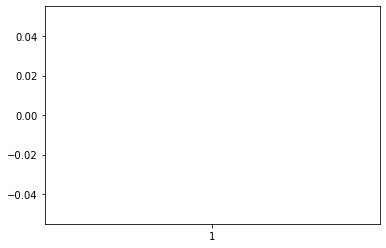

In [89]:
# Generating a boxplot for the Revenue values
plt.boxplot(df_csv_subset.Revenue, notch=True);

In [106]:
# Some outliers where the Revenue is <0 is causing the above errors
# Creating a separate data frame with >0 values only
df_pos_rev = df_csv_subset[(df_csv_subset['Revenue']>0)]
bf4=df_pos_rev.shape
bf4

(4139, 20)

In [103]:
# Generating a boxplot for the Revenue values
n = df_pos_rev.Revenue
log_rev=np.log10(n)

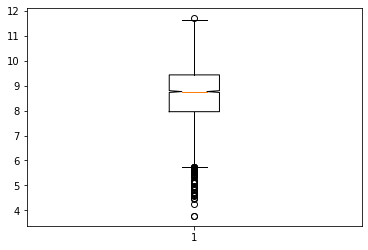

In [104]:
# Generating a boxplot using log of the Revenue values
plt.boxplot(log_rev, notch=True);

### From the above analysis it looks like that the log revenue values below 6 could be considered as outliers for our modeling involving Revenue values

In [75]:
# Duplicate values for the class variables
# There are no duplicate TICKERS as the Unique count is same as the total count.

df_csv_subset['Ticker'].nunique()

4392

### Lets perform a fuzzy matching on the Sector column to check for any mistyping

In [79]:
# Generating a list of the unique sector names
# The below list shows that the values are good.
# So not able to do any fuzzy matching here.

uniq_sector_nme = df_csv_subset['Sector'].unique() 
uniq_sector_nme

array(['Consumer Cyclical', 'Energy', 'Technology', 'Industrials',
       'Financial Services', 'Basic Materials', 'Communication Services',
       'Consumer Defensive', 'Healthcare', 'Real Estate', 'Utilities'],
      dtype=object)

### Checking for duplicate Ticker names

In [86]:
print("Ticker is duplicated - {}" .format(any(df_csv_subset.Ticker.duplicated())))

Ticker is duplicated - False


### On the other side it is expected to have the sectors duplicated and the below result proves it

In [87]:
print("Sector Name is duplicated - {}" .format(any(df_csv_subset.Sector.duplicated())))

Sector Name is duplicated - True
